In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/IEEE/Social_Network_Ads.csv') 
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
153,15619087,Female,36,50000,0
263,15767681,Female,35,72000,0
196,15738448,Female,30,79000,0
239,15772073,Female,53,143000,1
90,15684801,Male,22,81000,0
104,15672091,Female,19,21000,0
152,15699247,Male,31,76000,0
126,15610801,Male,42,65000,0
33,15776733,Female,28,44000,0
72,15595228,Female,20,23000,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [56]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

df = pd.get_dummies(df, columns=['Gender'])
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [60]:
features = ['Gender_Male', 'Gender_Female', 'Age', 'EstimatedSalary']

In [61]:
X = df[features]
y = df['Purchased']

In [ ]:
x.shape

In [63]:
X.head(5)

,Gender_Male,Gender_Female,Age,EstimatedSalary
0,1,0,19,19000
1,1,0,35,20000
2,0,1,26,43000
3,0,1,27,57000
4,1,0,19,76000


In [64]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

model = classifier.fit(X_train, y_train)

In [68]:
pred = model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, mean_absolute_error

mae = mean_absolute_error(pred, y_test)
mae
#0.125
#0.1625

0.1625

In [71]:
accuracy = accuracy_score(pred, y_test)
accuracy
#0.875
#0.8375

0.8375

In [73]:
model.score(X_test, y_test)
#0.875
#0.8375

0.8375

In [78]:
from sklearn.metrics import classification_report

classes = ['0', '1']

classification_report(y_test, y_pred, target_names=classes)

'              precision    recall  f1-score   support\n\n           0       0.62      0.64      0.63        47\n           1       0.47      0.45      0.46        33\n\n    accuracy                           0.56        80\n   macro avg       0.55      0.55      0.55        80\nweighted avg       0.56      0.56      0.56        80\n'

In [81]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df

,Actual,Predicted
129,0,0
198,0,0
8,0,0
309,0,0
355,1,1
...,...,...
38,0,0
324,1,1
325,0,0
135,0,0


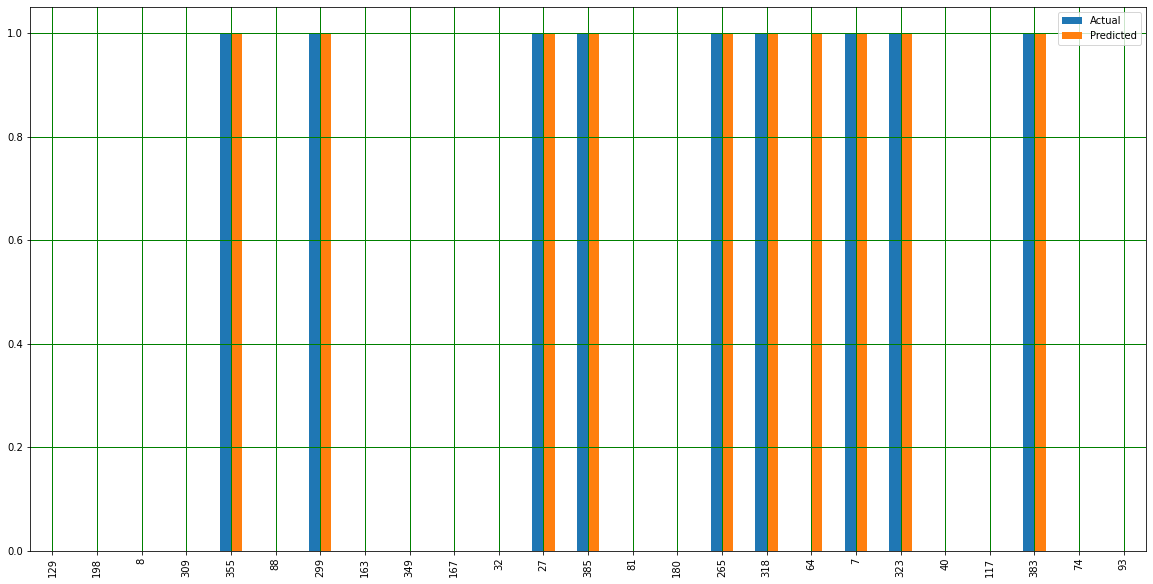

In [77]:
import matplotlib.pyplot as plt
import pandas as pd


df1 = df.head(25)
df1.plot(kind='bar', figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

In [ ]:
# Let's test our model on new data

new_data = [[31, 11800]]
new_pred = clf.predict(new_data)
new_pred[0]

0